In [1]:
from astropy.io import fits
import numpy as np

from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

jwst = fits.open(image_file)

print(jwst)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1050b8c20>, <astropy.io.fits.hdu.table.TableHDU object at 0x1050b8ec0>]


In [2]:
jwst.info()

header = jwst[1].header

print('Header information is')
header

data = jwst[0].data

np.shape(data)


Filename: /Users/diego/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
Header information is


(893, 891)

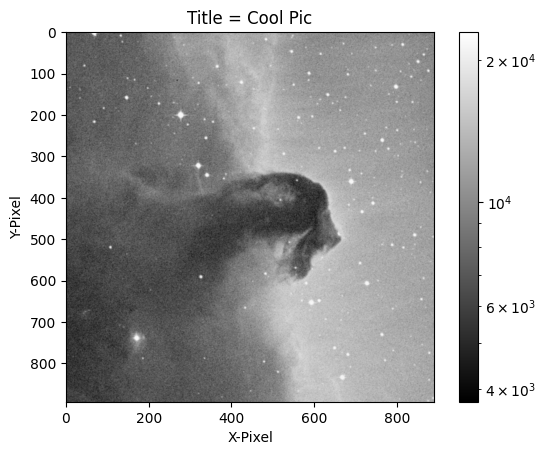

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(data, cmap = 'grey', norm = LogNorm())
plt.title('Title = Cool Pic')
plt.ylabel('Y-Pixel')
plt.xlabel('X-Pixel')
plt.colorbar()
plt.show()

In [4]:
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


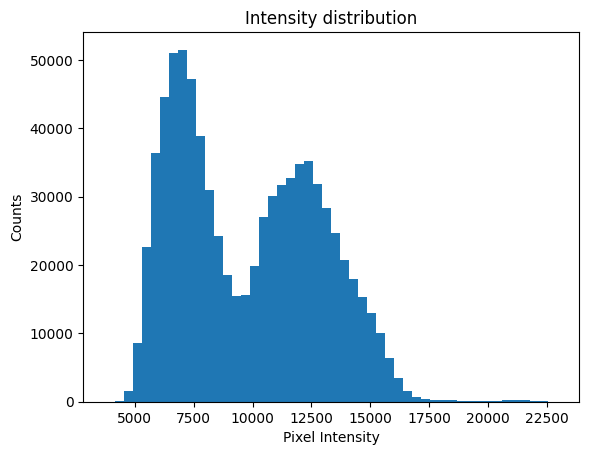

In [5]:
plt.figure()
plt.hist(np.ravel(data), bins=50)
plt.title('Intensity distribution')
plt.ylabel('Counts')
plt.xlabel('Pixel Intensity')
plt.show()

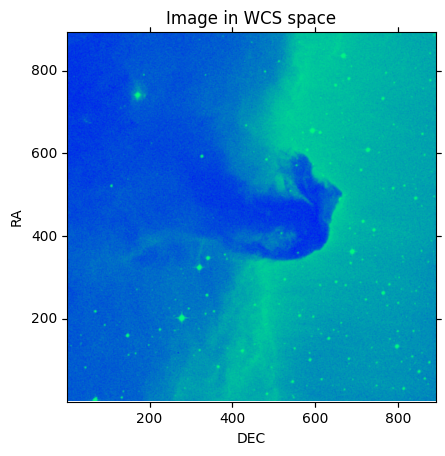

In [6]:
from astropy.wcs import WCS
wcs = WCS(jwst[1].header)
wcs
plt.figure()
plt.subplot(projection = wcs)
plt.imshow(data, cmap = 'winter', norm = LogNorm())
plt.title('Image in WCS space')
plt.ylabel('RA')
plt.xlabel('DEC')